In [1]:
import pandas as pd

In [16]:
#Recupero la tabella allArea salvata in beijing.csv
allArea = pd.read_csv('Geohash1.csv')
del allArea['Unnamed: 0']
allArea.head()

,geohash_list,StartingVehicles,EndingVehicles,TotNumberRecordVehicles,maxSpeed_km/h,AverageSpeed,OutEdges,InEdges,VehiclesNight(24-5 am),VehiclesMorning(6-12 am),...,AverageAcceleration_m/s^2,"NumberCulturalPoint(""Museum-Attraction-Ruins"")","NumberFinancePoint(""Bank-Company"")","NumberHealthPoint(""Hospital-Dentist-Pharmacy"")","NumberTrasportationPoint(""Fuel-BusStation-TaxiStop"")","NumberEducationPoint(""University-Library"")","NumberEnterteimentPoint(""Cinema-Theatre-Zoo-Stadium-SwimmingPool"")",NumberWeekPoint(4-5-6-7-8),NumberWeekendPoint(2-3),NumberTotalPointInterest
0,wx4es,2,2,437,87.739920,8.385532,2,2,153,164,...,0.027443,5,2,2,3,1,0,340,97,13
1,wx4f8,80,79,16142,148.981262,14.313472,55,54,2870,4060,...,0.336242,2,1,5,8,0,3,11349,4793,19
2,wx5n2,0,0,0,NaN,NaN,0,0,0,0,...,NaN,0,0,0,0,0,0,0,0,0
3,wx5r5,0,0,13,57.600670,16.654790,0,0,0,3,...,0.012960,0,0,0,0,0,0,13,0,0
4,wx5rx,0,0,0,NaN,NaN,0,0,0,0,...,NaN,0,0,0,0,0,0,0,0,0


In [17]:
#riempio gli attributi dove è contenuto NaN
attributes = [col for col in allArea.columns]

allArea[attributes] = allArea[attributes].fillna(0)

In [4]:
#Verifico quelli che sono gli attributi all'interno di allArea

for c in allArea.columns:
    print(c)

geohash_list
StartingVehicles
EndingVehicles
TotNumberRecordVehicles
maxSpeed_km/h
AverageSpeed
OutEdges
InEdges
VehiclesNight(24-5 am)
VehiclesMorning(6-12 am)
VehiclesAfternoon(13-18 pm)
VehiclesEvening(19-23 pm)
Density_n/km^2
AccelarationMax
AverageAcceleration_m/s^2
NumberCulturalPoint("Museum-Attraction-Ruins")
NumberFinancePoint("Bank-Company")
NumberHealthPoint("Hospital-Dentist-Pharmacy")
NumberTrasportationPoint("Fuel-BusStation-TaxiStop")
NumberEducationPoint("University-Library")
NumberEnterteimentPoint("Cinema-Theatre-Zoo-Stadium-SwimmingPool")
NumberWeekPoint(4-5-6-7-8)
NumberWeekendPoint(2-3)
NumberTotalPointInterest


In [18]:
#importo ora uno tra allStart o allEnd (entrambi possiedono id_geohashPartenza ed id_geohashArrivo)
allStart = pd.read_csv('allPickup.csv')
del allStart['Unnamed: 0']
allStart.head()

,Id,longitude,latitude,District,cluster,address,interess
0,1120,116.41442,39.85614,fengtai,7,"南三环中路, 东罗园村, Fengtai District, Beijing, 100075...",NaN
1,21,116.56620,40.07108,shunyi,3,"小王辛庄村, Shunyi District, Beijing, 101312, China",NaN
2,5324,116.36391,39.96617,xicheng,7,"新街口外大街, Haidian District, Beijing, 100875, China",-bank-
3,5762,116.46485,39.92444,cahoyang,7,"South Tuanjiehu Road, Liulitun, Chaoyang Distr...",NaN
4,10307,116.44034,39.96209,cahoyang,7,"Taiyanggong, Chaoyang District, Beijing, 10002...",NaN


In [19]:
import pygeohash as gh
allStart['geohash_area']=allStart.apply(lambda x: gh.encode(x.latitude, x.longitude, precision=5), axis=1)

In [20]:
allEnd = pd.read_csv('allDropoff.csv')
del allEnd['Unnamed: 0']
allEnd.head()

,Id,longitude,latitude,District,cluster,address,interess
0,1120,116.42108,39.93961,dongcheng,9,"Dongzhimen Inner Street, Naga上院, Dongcheng Dis...",-bank-police-
1,21,116.70697,39.72232,tongzhou,3,"Tongzhou District, Yujiawu, Beijing, China",NaN
2,5324,116.37307,39.91673,xicheng,7,"Xicheng District, Beijing, 100032, China",NaN
3,5762,116.52080,40.04511,cahoyang,3,"Sunhe, Chaoyang District, Beijing, 100103, China",NaN
4,10307,116.44020,39.96455,cahoyang,9,"西坝河东里小区, Taiyanggong, Chaoyang District, Beiji...",NaN


In [21]:
allEnd['geohash_area']=allEnd.apply(lambda x: gh.encode(x.latitude, x.longitude, precision=5), axis=1)

In [22]:
allStart['end'] = allEnd['geohash_area']

In [10]:
#creo le liste id partenza ed arrivo per area

i = 0
idPartenza = []
idArrivo = []
allAreaLen = len(allArea['geohash_list'])
while(i<allAreaLen):
    j=0
    while(j<allAreaLen):
        idPartenza.append(allArea['geohash_list'][i])
        idArrivo.append(allArea['geohash_list'][j])
        j=j+1
    i=i+1

In [11]:
#creo il dataframe che contiene idPartenza idArrivo e flusso
df1 = pd.DataFrame()
df1['IdPartenza'] = idPartenza
df1['IdArrivo'] = idArrivo
df1.head()

,IdPartenza,IdArrivo
0,wx4es,wx4es
1,wx4es,wx4f8
2,wx4es,wx5n2
3,wx4es,wx5r5
4,wx4es,wx5rx


In [12]:
#mi manca da calcolare il numero di veicoli che partono da IdPartenza_i ed arrivano ad IdArrivo_i
i = 0
result = []
alldf1Len = len(df1['IdArrivo'])
while(i<alldf1Len):
    areaPartenza = allStart[allStart.geohash_area == df1['IdPartenza'][i]]
    areaPartenza1 = areaPartenza[areaPartenza.end == df1['IdArrivo'][i]]
    
    result.append(len(areaPartenza1))

    i=i+1

In [13]:
df1['y'] = result
df1

,IdPartenza,IdArrivo,y
0,wx4es,wx4es,0
1,wx4es,wx4f8,0
2,wx4es,wx5n2,0
3,wx4es,wx5r5,0
4,wx4es,wx5rx,0
...,...,...,...
1216604,wx441,wx43m,0
1216605,wx441,wx41j,0
1216606,wx441,wx4f3,0
1216607,wx441,wx4zk,0


In [14]:
#primo dataframe creato, ora dovrei fare un merge tra allArea e df1
#difficile che si possa fare con qualche libreria, dovrei utilizzare una funzione

df2 = pd.DataFrame()

df2['idPartenza'] = idPartenza
df2['idArrivo'] = idArrivo

In [ ]:
#creare il grande dataframe per effettuare training e test
i = 0
StartingVehicleA = []
EndingVehicles =[]
TotNumberRecordVehicles =[]
maxSpeed_km =[]
AverageSpeed =[]
OutEdges =[]
InEdges =[]
VehiclesNight =[]
VehiclesMorning =[]
VehiclesAfternoon =[]
VehiclesEvening =[]
Density_n =[]
AccelarationMax =[]
AverageAcceleration =[]
NumberTotalPointInterest =[]
NumberCulturalPoint =[]
NumberFinancePoint =[]
NumberHealthPoint =[]
NumberTrasportationPoint =[]
NumberEducationPoint = []
NumberEnterteimentPoint = []
RecordWeekend =[]
RecordWeek =[]

StartingVehicleB = []
EndingVehiclesB =[]
TotNumberRecordVehiclesB =[]
maxSpeed_kmB =[]
AverageSpeedB =[]
OutEdgesB =[]
InEdgesB =[]
VehiclesNightB =[]
VehiclesMorningB =[]
VehiclesAfternoonB =[]
VehiclesEveningB =[]
Density_nB =[]
AccelarationMaxB =[]
AverageAcceleration_mB =[]
NumberTotalPointInterestB =[]
NumberCulturalPointB =[]
NumberFinancePointB =[]
NumberHealthPointB =[]
NumberTrasportationPointB =[]
NumberEducationPointB =[]
NumberEnterteimentPointB =[]
RecordWeekendB =[]
RecordWeekB =[]


allAreaLen = len(allArea['geohash_list'])
while(i<allAreaLen):
    j=0
    while(j<allAreaLen):
        
        StartingVehicleA.append(allArea['StartingVehicles'][i])
        EndingVehicles.append(allArea['EndingVehicles'][i])
        TotNumberRecordVehicles.append(allArea['TotNumberRecordVehicles'][i])
        maxSpeed_km.append(allArea['maxSpeed_km/h'][i])
        AverageSpeed.append(allArea['AverageSpeed'][i])
        OutEdges.append(allArea['OutEdges'][i])
        InEdges.append(allArea['InEdges'][i])
        VehiclesNight.append(allArea['VehiclesNight(24-5 am)'][i])
        VehiclesMorning.append(allArea['VehiclesMorning(6-12 am)'][i])
        VehiclesAfternoon.append(allArea['VehiclesAfternoon(13-18 pm)'][i])
        VehiclesEvening.append(allArea['VehiclesEvening(19-23 pm)'][i])
        Density_n.append(allArea['Density_n/km^2'][i])
        AccelarationMax.append(allArea['AccelarationMax'][i])
        AverageAcceleration.append(allArea['AverageAcceleration_m/s^2'][i])
        NumberTotalPointInterest.append(allArea['NumberTotalPointInterest'][i])
        NumberCulturalPoint.append(allArea['NumberCulturalPoint("Museum-Attraction-Ruins")'][i])
        NumberEducationPoint.append(allArea['NumberEducationPoint("University-Library")'][i])
        NumberEnterteimentPoint.append(allArea['NumberEnterteimentPoint("Cinema-Theatre-Zoo-Stadium-SwimmingPool")'][i])
        NumberFinancePoint.append(allArea['NumberFinancePoint("Bank-Company")'][i])
        NumberHealthPoint.append(allArea['NumberHealthPoint("Hospital-Dentist-Pharmacy")'][i])
        NumberTrasportationPoint.append(allArea['NumberTrasportationPoint("Fuel-BusStation-TaxiStop")'][i])
        RecordWeekend.append(allArea['NumberWeekendPoint(2-3)'][i])
        RecordWeek.append(allArea['NumberWeekPoint(4-5-6-7-8)'][i])
        
        
        
        
        
        
        #B
        
        
        StartingVehicleB.append(allArea['StartingVehicles'][j])
        EndingVehiclesB.append(allArea['EndingVehicles'][j])
        TotNumberRecordVehiclesB.append(allArea['TotNumberRecordVehicles'][j])
        maxSpeed_kmB.append(allArea['maxSpeed_km/h'][j])
        AverageSpeedB.append(allArea['AverageSpeed'][j])
        OutEdgesB.append(allArea['OutEdges'][j])
        InEdgesB.append(allArea['InEdges'][j])
        VehiclesNightB.append(allArea['VehiclesNight(24-5 am)'][j])
        VehiclesMorningB.append(allArea['VehiclesMorning(6-12 am)'][j])
        VehiclesAfternoonB.append(allArea['VehiclesAfternoon(13-18 pm)'][j])
        VehiclesEveningB.append(allArea['VehiclesEvening(19-23 pm)'][j])
        Density_nB.append(allArea['Density_n/km^2'][j])
        AccelarationMaxB.append(allArea['AccelarationMax'][j])
        AverageAcceleration_mB.append(allArea['AverageAcceleration_m/s^2'][j])
        NumberTotalPointInterestB.append(allArea['NumberTotalPointInterest'][j])
        NumberCulturalPointB.append(allArea['NumberCulturalPoint("Museum-Attraction-Ruins")'][j])
        NumberEducationPointB.append(allArea['NumberEducationPoint("University-Library")'][j])
        NumberEnterteimentPointB.append(allArea['NumberEnterteimentPoint("Cinema-Theatre-Zoo-Stadium-SwimmingPool")'][j])
        NumberFinancePointB.append(allArea['NumberFinancePoint("Bank-Company")'][j])
        NumberHealthPointB.append(allArea['NumberHealthPoint("Hospital-Dentist-Pharmacy")'][j])
        NumberTrasportationPointB.append(allArea['NumberTrasportationPoint("Fuel-BusStation-TaxiStop")'][j])
        RecordWeekendB.append(allArea['NumberWeekendPoint(2-3)'][j])
        RecordWeekB.append(allArea['NumberWeekPoint(4-5-6-7-8)'][j])
        
        
        
        
        j=j+1
    i=i+1

In [ ]:
df2['StartingVehiclesA'] = StartingVehicleA
df2['EndingVehiclesA'] = EndingVehicles
df2['TotNumberRecordVehiclesA'] = TotNumberRecordVehicles
df2['maxSpeedKm/hA'] = maxSpeed_km
df2['AverageSpeedA'] = AverageSpeed
df2['OutEdgesA'] =OutEdges
df2['InEdgesA'] =InEdges
df2['VehiclesNightA'] = VehiclesNight
df2['VehiclesMorningA'] =VehiclesMorning
df2['VehiclesAfternoonA'] = VehiclesAfternoon
df2['VehiclesEveningA'] =VehiclesEvening
df2['Density_n/km^2A'] =Density_n
df2['AccelerationMaxA'] = AccelarationMax
df2['AverageAccelerationA'] = AverageAcceleration
df2['NumberTotalPointInterestA'] = NumberTotalPointInterest
df2['NumberCulturalPointA'] = NumberCulturalPoint
df2['NumberEducationPointA']= NumberEducationPoint
df2['NumberEnterteimentPointA'] = NumberEnterteimentPoint
df2['NumberFinancePointA'] = NumberFinancePoint
df2['NumberHealthPointA'] = NumberHealthPoint
df2['NumberTrasportationPointA'] = NumberTrasportationPoint
df2['RecordWeekendA'] = RecordWeekend
df2['RecordWeekA'] = RecordWeek


#B

df2['StartingVehiclesB'] = StartingVehicleB
df2['EndingVehiclesB'] = EndingVehiclesB
df2['TotNumberRecordVehiclesB'] = TotNumberRecordVehiclesB
df2['maxSpeedKm/hB'] = maxSpeed_kmB
df2['AverageSpeedB'] = AverageSpeedB
df2['OutEdgesB'] =OutEdgesB
df2['InEdgesB'] =InEdgesB
df2['VehiclesNightB'] = VehiclesNightB
df2['VehiclesMorningB'] =VehiclesMorningB
df2['VehiclesAfternoonB'] = VehiclesAfternoonB
df2['VehiclesEveningB'] =VehiclesEveningB
df2['Density_n/km^2B'] =Density_nB
df2['AccelerationMaxB'] = AccelarationMaxB
df2['AverageAccelerationB'] = AverageAcceleration_mB
df2['NumberTotalPointInterestB'] = NumberTotalPointInterestB
df2['NumberCulturalPointB'] = NumberCulturalPointB
df2['NumberEducationPointB'] = NumberEducationPointB
df2['NumberEnterteimentPointB'] = NumberEnterteimentPointB
df2['NumberFinancePointB'] = NumberFinancePointB
df2['NumberHealthPointB'] = NumberHealthPointB
df2['NumberTrasportationPointB'] = NumberTrasportationPointB
df2['RecordWeekendB'] = RecordWeekendB
df2['RecordWeekB'] = RecordWeekB



In [ ]:
df2

In [ ]:
df2['y'] = df1['y']

In [ ]:
df2.to_csv('y.csv')

In [1]:
import pandas as pd
df2 = pd.read_csv('y.csv')

In [2]:
del df2['idPartenza']
del df2['Unnamed: 0']
del df2['idArrivo']

# Train & test split

In [3]:
#divido il dataframe in train e test
from sklearn.model_selection import train_test_split

class_name = 'y'

attributes = [col for col in df2.columns if col != class_name]
X = df2[attributes].values
y=df2[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

In [4]:
#normalizzazione dati
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor



In [7]:
errorMAE = []
errorMSE = []
errorR2 = []
print('start')

for k in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=k,n_jobs=4,algorithm='kd_tree')
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    print(k)
    print('R2: %.3f' % r2_score(y_test, y_pred))
    print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
    print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))
    errorR2.append(r2_score(y_test,y_pred)) 

start
1
R2: -0.175
MSE: 0.025
MAE: 0.004
2
R2: 0.003
MSE: 0.021
MAE: 0.004
3
R2: 0.065
MSE: 0.020
MAE: 0.004
4
R2: 0.114
MSE: 0.019
MAE: 0.004
5
R2: 0.110
MSE: 0.019
MAE: 0.004
6
R2: 0.128
MSE: 0.019
MAE: 0.004
7
R2: 0.135
MSE: 0.019
MAE: 0.004
8
R2: 0.155
MSE: 0.018
MAE: 0.004
9
R2: 0.190
MSE: 0.017
MAE: 0.004
10
R2: 0.206
MSE: 0.017
MAE: 0.004
11
R2: 0.214
MSE: 0.017
MAE: 0.004
12
R2: 0.211
MSE: 0.017
MAE: 0.004
13
R2: 0.204
MSE: 0.017
MAE: 0.004
14
R2: 0.223
MSE: 0.017
MAE: 0.004
15
R2: 0.224
MSE: 0.017
MAE: 0.004
16
R2: 0.223
MSE: 0.017
MAE: 0.004
17
R2: 0.220
MSE: 0.017
MAE: 0.004
18
R2: 0.221
MSE: 0.017
MAE: 0.004
19
R2: 0.219
MSE: 0.017
MAE: 0.004
20
R2: 0.219
MSE: 0.017
MAE: 0.004
21
R2: 0.218
MSE: 0.017
MAE: 0.004
22
R2: 0.247
MSE: 0.016
MAE: 0.004
23
R2: 0.250
MSE: 0.016
MAE: 0.004
24
R2: 0.247
MSE: 0.016
MAE: 0.004
25
R2: 0.245
MSE: 0.016
MAE: 0.004
26
R2: 0.243
MSE: 0.016
MAE: 0.004
27
R2: 0.247
MSE: 0.016
MAE: 0.004
28
R2: 0.245
MSE: 0.016
MAE: 0.004
29
R2: 0.244
MSE: 0.01

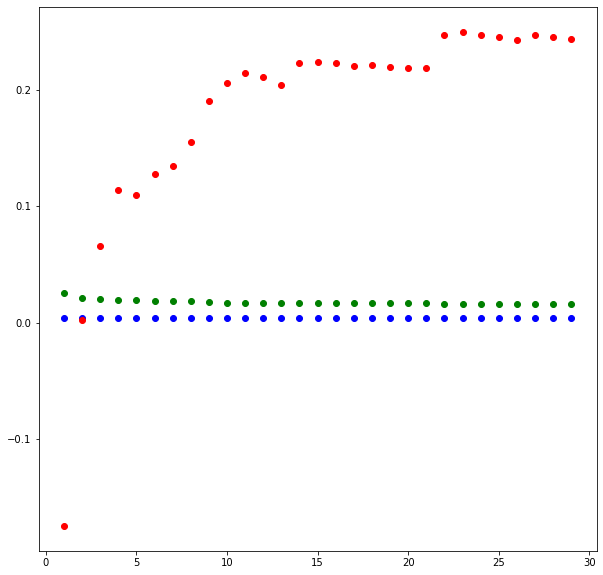

In [8]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,30),errorMAE,'bo')
plt.plot(range(1,30),errorMSE,'go')
plt.plot(range(1,30),errorR2,'ro')

# Regressione Lineare

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [9]:
y_pred = reg.predict(X_test_s)

In [10]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.016
MSE: 0.021
MAE: 0.010


# Lasso

In [11]:
reg = Lasso()
reg.fit(X_train_s,y_train)

Lasso()

In [12]:
y_pred = reg.predict(X_test_s)

In [13]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.022
MAE: 0.007


# Ridge

In [14]:
reg = Ridge()
reg.fit(X_train_s,y_train)

Ridge()

In [15]:
y_pred = reg.predict(X_test_s)

In [16]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.016
MSE: 0.021
MAE: 0.010


# Dataset Veicoli (eliminare attributi relativi all'area)

In [17]:
df3 = pd.DataFrame(df2) #dataframe con attributi relativi ai veicoli

In [18]:
del df3['NumberTotalPointInterestA']
del df3['NumberCulturalPointA']
del df3['NumberEducationPointA']
del df3['NumberEnterteimentPointA']
del df3['NumberFinancePointA']
del df3['NumberHealthPointA']
del df3['NumberTrasportationPointA']
del df3['NumberTotalPointInterestB']
del df3['NumberCulturalPointB']
del df3['NumberEducationPointB']
del df3['NumberEnterteimentPointB']
del df3['NumberFinancePointB']
del df3['NumberHealthPointB']
del df3['NumberTrasportationPointB']

In [19]:
df3

,StartingVehiclesA,EndingVehiclesA,TotNumberRecordVehiclesA,maxSpeedKm/hA,AverageSpeedA,OutEdgesA,InEdgesA,VehiclesNightA,VehiclesMorningA,VehiclesAfternoonA,...,VehiclesNightB,VehiclesMorningB,VehiclesAfternoonB,VehiclesEveningB,Density_n/km^2B,AccelerationMaxB,AverageAccelerationB,RecordWeekendB,RecordWeekB,y
0,2,2,437,87.73992,8.385532,2,2,153,164,69,...,153,164,69,51,18.275266,1.608753,0.027443,97,340,0
1,2,2,437,87.73992,8.385532,2,2,153,164,69,...,2870,4060,5483,3729,675.055725,20.499622,0.336242,4793,11349,0
2,2,2,437,87.73992,8.385532,2,2,153,164,69,...,0,0,0,0,0.000000,0.000000,0.000000,0,0,0
3,2,2,437,87.73992,8.385532,2,2,153,164,69,...,0,3,0,10,0.543658,0.053334,0.012960,0,13,0
4,2,2,437,87.73992,8.385532,2,2,153,164,69,...,0,0,0,0,0.000000,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216604,0,0,0,0.00000,0.000000,0,0,0,0,0,...,1,14,55,13,3.471046,1.395958,0.077596,36,47,0
1216605,0,0,0,0.00000,0.000000,0,0,0,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0,0,0
1216606,0,0,0,0.00000,0.000000,0,0,0,0,0,...,2342,1847,2376,1882,353.252119,8.856833,0.080433,1372,7075,0
1216607,0,0,0,0.00000,0.000000,0,0,0,0,0,...,0,0,0,0,0.000000,0.000000,0.000000,0,0,0


# Train & test split( Dataframe Veicoli)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

class_name = 'y'

attributes = [col for col in df3.columns if col != class_name]
X = df3[attributes].values
y=df3[class_name]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

In [22]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

# KNN (DataFrame Veicoli)


# Find Best K (DataFrame Veicoli)

In [16]:
from sklearn.neighbors import KNeighborsRegressor
errorR2 = []
errorMAE = []
errorMSE =[]

for k in range(1,12):
    knn = KNeighborsRegressor(n_neighbors=k,n_jobs=-1,algorithm='kd_tree')
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    print(k)
    errorR2.append(r2_score(y_test,y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))

1
2
3
4
5
6
7
8
9
10
11


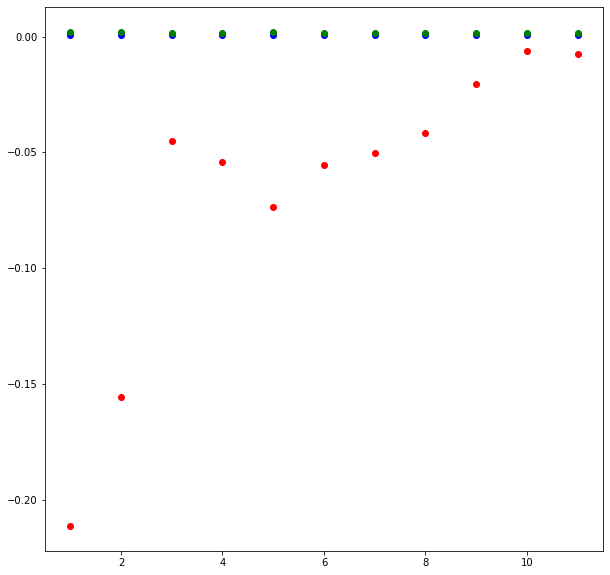

In [17]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,12),errorMAE,'bo')
plt.plot(range(1,12),errorMSE,'go')
plt.plot(range(1,12),errorR2,'ro')

In [23]:
# Regresione Lineare
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [24]:
reg = LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

In [25]:
y_pred = reg.predict(X_test_s)

In [26]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.016
MSE: 0.021
MAE: 0.010


In [27]:
# Lasso

In [28]:
reg = Lasso()
reg.fit(X_train_s, y_train)

Lasso()

In [29]:
y_pred = reg.predict(X_test_s)

In [30]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: -0.000
MSE: 0.022
MAE: 0.007


In [31]:
# Ridge 

In [32]:
reg = Ridge()
reg.fit(X_train_s, y_train)

Ridge()

In [33]:
y_pred = reg.predict(X_test_s)

In [34]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.016
MSE: 0.021
MAE: 0.010


# DataFrame punti di interesse

In [35]:
df4 = pd.DataFrame()

In [39]:
df4['NumberTotalPointInterestA'] = df2['NumberTotalPointInterestA'] 
df4['NumberCulturalPointA'] = df2['NumberCulturalPointA']
df4['NumberEducationPointA'] = df2['NumberEducationPointA']
df4['NumberEnterteimentPointA'] = df2['NumberEnterteimentPointA']
df4['NumberFinancePointA'] = df2['NumberFinancePointA']
df4['NumberHealthPointA'] = df2['NumberHealthPointA']
df4['NumberTrasportationPointA'] = df2['NumberTrasportationPointA']
df4['NumberTotalPointInterestB'] = df2['NumberTotalPointInterestB']
df4['NumberCulturalPointB'] = df2['NumberCulturalPointB']
df4['NumberEducationPointB'] = df2['NumberEducationPointB']
df4['NumberEnterteimentPointB'] = df2['NumberEnterteimentPointB'] 
df4['NumberFinancePointB'] = df2['NumberFinancePointB']
df4['NumberHealthPointB'] = df2['NumberHealthPointB']
df4['NumberTrasportationPointB'] = df2['NumberTrasportationPointB']
df4['y'] = df2['y']

In [40]:
from sklearn.model_selection import train_test_split

class_name = 'y'

attributes = [col for col in df4.columns if col != class_name]
X = df4[attributes].values
y=df4[class_name]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

In [ ]:
errorR2 = []
errorMAE = []
errorMSE =[]
print('start')
for k in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=k,n_jobs=-1,algorithm='kd_tree')
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    print(k)
    errorR2.append(r2_score(y_test,y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,30),errorMAE,'bo')
plt.plot(range(1,30),errorMSE,'go')
plt.plot(range(1,30),errorR2,'ro')

# Divisione della città (NORD-SUD-EST-OVEST)

In [3]:
import geopandas as gpd
import pandas as pd
from polygeohasher import polygeohasher
import json
gdf = gpd.read_file('./prova.geojson')
primary_df = polygeohasher.create_geohash_list(gdf,3,inner=False)
geo_df = polygeohasher.geohashes_to_geometry(primary_df,"geohash_list")
geo_df.to_file("SanFranciscoGrid.geojson",driver = "GeoJSON")
SanFranGrid = json.load(open('SanFranciscoGrid.geojson','r'))

In [4]:
import folium
m = folium.Map([39.20, 116.26], zoom_start=12, tiles='cartodbpositron')
folium.GeoJson(SanFranGrid, name="geojson").add_to(m)
m

In [5]:
from shapely import wkt
geo_df.to_csv("Tassellation.csv") #solito problema per ordinare il geodataframe
tasselation = pd.read_csv("./Tassellation.csv")
del tasselation["Unnamed: 0"]
tasselation['geometry'] = tasselation['geometry'].apply(wkt.loads)
geo_tassellation = gpd.GeoDataFrame(
    tasselation,geometry='geometry')

In [6]:
new_geo = geo_tassellation.drop_duplicates(subset='geohash_list')

In [7]:
new_geo = new_geo.reset_index()

In [8]:
del new_geo['index']

In [9]:
new_geo

,geohash_list,geometry
0,wx7,"POLYGON ((116.71875 40.78125, 118.12500 40.781..."
1,wwf,"POLYGON ((115.31250 37.96875, 116.71875 37.968..."
2,wx3,"POLYGON ((113.90625 40.78125, 115.31250 40.781..."
3,wwg,"POLYGON ((116.71875 37.96875, 118.12500 37.968..."
4,wwc,"POLYGON ((113.90625 37.96875, 115.31250 37.968..."
5,wx4,"POLYGON ((115.31250 39.37500, 116.71875 39.375..."
6,wx1,"POLYGON ((113.90625 39.37500, 115.31250 39.375..."
7,wx6,"POLYGON ((115.31250 40.78125, 116.71875 40.781..."
8,wx5,"POLYGON ((116.71875 39.37500, 118.12500 39.375..."


In [10]:
gdf = gpd.read_file('./Beijing-Boundaries.geojson')
primary_df = polygeohasher.create_geohash_list(gdf,5,inner=False)
geo_df = polygeohasher.geohashes_to_geometry(primary_df,"geohash_list")
geo_df.to_file("SanFranciscoGrid.geojson",driver = "GeoJSON")
SanFranGrid = json.load(open('SanFranciscoGrid.geojson','r'))

In [11]:
geo_df.to_csv("Tassellation.csv") #solito problema per ordinare il geodataframe
tasselation = pd.read_csv("./Tassellation.csv")
del tasselation["Unnamed: 0"]
tasselation['geometry'] = tasselation['geometry'].apply(wkt.loads)
geo_tassellation = gpd.GeoDataFrame(
    tasselation,geometry='geometry')

In [12]:
sixGeo = geo_tassellation.drop_duplicates(subset='geohash_list')

In [13]:
sixGeo = sixGeo.reset_index()

In [14]:
del sixGeo['index']

In [23]:
i = 0
areaLen = len(allArea['geohash_list'])
sixLen= len(sixGeo['geohash_list'])
result =[]

while(i<areaLen):
    j=0
    find = 0
    while(j<sixLen and find !=1 ):
        if(sixGeo['geohash_list'][j]==allArea['geohash_list'][i]):
            result.append(sixGeo['geometry'][j])
            find = 1
        else:    
            j=j+1  
    i=i+1

In [24]:
allArea['geometry'] = result

In [25]:
from shapely.geometry import Point, Polygon
def checkPolygon(allArea,new_geo):
    i = 0
    find = 0
    result = []
    areaLen = len(allArea['geohash_list'])
    geoLen = len(new_geo['geohash_list'])
    while(i<areaLen):
        if(allArea['geometry'][i].within(new_geo['geometry'][0])):
            result.append('NORD-EST')
        elif(allArea['geometry'][i].within(new_geo['geometry'][1])):
            result.append('SUD')
        elif(allArea['geometry'][i].within(new_geo['geometry'][2])):
            result.append('NORD-OVEST')
        elif(allArea['geometry'][i].within(new_geo['geometry'][3])):
            result.append('SUD-EST')
        elif(allArea['geometry'][i].within(new_geo['geometry'][4])):
            result.append('SUD-OVEST')
        elif(allArea['geometry'][i].within(new_geo['geometry'][5])):
            result.append('CENTRO')
        elif(allArea['geometry'][i].within(new_geo['geometry'][6])):
            result.append('OVEST')
        elif(allArea['geometry'][i].within(new_geo['geometry'][7])):
            result.append('NORD')
        elif(allArea['geometry'][i].within(new_geo['geometry'][8])):
            result.append('EST')
        i=i+1
    return result

In [26]:
result = checkPolygon(allArea,new_geo)

In [27]:
allArea['Direction'] = result

In [28]:
#devo creare rispettivamente le tabelle sia per i varie cardinalità
def createTable(allArea):
    i = 0
    idPartenza = []
    idArrivo = []
    allAreaLen = len(allArea['geohash_list'])
    while(i<allAreaLen):
        j=0
        while(j<allAreaLen):
            idPartenza.append(allArea['geohash_list'][i])
            idArrivo.append(allArea['geohash_list'][j])
            j=j+1
        i=i+1
    df = pd.DataFrame()
    df['IdPartenza'] = idPartenza
    df['IdArrivo'] = idArrivo
    return df

In [29]:
def y(df1,allStart):
    i = 0
    result = []
    alldf1Len = len(df1['IdArrivo'])
    while(i<alldf1Len):
        areaPartenza = allStart[allStart.geohash_area == df1['IdPartenza'][i]]
        areaPartenza1 = areaPartenza[areaPartenza.end == df1['IdArrivo'][i]]

        result.append(len(areaPartenza1))

        i=i+1
    return result

In [30]:
def createSet(allArea):
    i = 0
    StartingVehicleA = []
    EndingVehicles =[]
    TotNumberRecordVehicles =[]
    maxSpeed_km =[]
    AverageSpeed =[]
    OutEdges =[]
    InEdges =[]
    VehiclesNight =[]
    VehiclesMorning =[]
    VehiclesAfternoon =[]
    VehiclesEvening =[]
    Density_n =[]
    AccelarationMax =[]
    AverageAcceleration =[]
    NumberTotalPointInterest =[]
    NumberCulturalPoint =[]
    NumberFinancePoint =[]
    NumberHealthPoint =[]
    NumberTrasportationPoint =[]
    NumberEducationPoint = []
    NumberEnterteimentPoint = []
    RecordWeekend =[]
    RecordWeek =[]

    StartingVehicleB = []
    EndingVehiclesB =[]
    TotNumberRecordVehiclesB =[]
    maxSpeed_kmB =[]
    AverageSpeedB =[]
    OutEdgesB =[]
    InEdgesB =[]
    VehiclesNightB =[]
    VehiclesMorningB =[]
    VehiclesAfternoonB =[]
    VehiclesEveningB =[]
    Density_nB =[]
    AccelarationMaxB =[]
    AverageAcceleration_mB =[]
    NumberTotalPointInterestB =[]
    NumberCulturalPointB =[]
    NumberFinancePointB =[]
    NumberHealthPointB =[]
    NumberTrasportationPointB =[]
    NumberEducationPointB =[]
    NumberEnterteimentPointB =[]
    RecordWeekendB =[]
    RecordWeekB =[]


    allAreaLen = len(allArea['geohash_list'])
    while(i<allAreaLen):
        j=0
        while(j<allAreaLen):

            StartingVehicleA.append(allArea['StartingVehicles'][i])
            EndingVehicles.append(allArea['EndingVehicles'][i])
            TotNumberRecordVehicles.append(allArea['TotNumberRecordVehicles'][i])
            maxSpeed_km.append(allArea['maxSpeed_km/h'][i])
            AverageSpeed.append(allArea['AverageSpeed'][i])
            OutEdges.append(allArea['OutEdges'][i])
            InEdges.append(allArea['InEdges'][i])
            VehiclesNight.append(allArea['VehiclesNight(24-5 am)'][i])
            VehiclesMorning.append(allArea['VehiclesMorning(6-12 am)'][i])
            VehiclesAfternoon.append(allArea['VehiclesAfternoon(13-18 pm)'][i])
            VehiclesEvening.append(allArea['VehiclesEvening(19-23 pm)'][i])
            Density_n.append(allArea['Density_n/km^2'][i])
            AccelarationMax.append(allArea['AccelarationMax'][i])
            AverageAcceleration.append(allArea['AverageAcceleration_m/s^2'][i])
            NumberTotalPointInterest.append(allArea['NumberTotalPointInterest'][i])
            NumberCulturalPoint.append(allArea['NumberCulturalPoint("Museum-Attraction-Ruins")'][i])
            NumberEducationPoint.append(allArea['NumberEducationPoint("University-Library")'][i])
            NumberEnterteimentPoint.append(allArea['NumberEnterteimentPoint("Cinema-Theatre-Zoo-Stadium-SwimmingPool")'][i])
            NumberFinancePoint.append(allArea['NumberFinancePoint("Bank-Company")'][i])
            NumberHealthPoint.append(allArea['NumberHealthPoint("Hospital-Dentist-Pharmacy")'][i])
            NumberTrasportationPoint.append(allArea['NumberTrasportationPoint("Fuel-BusStation-TaxiStop")'][i])
            RecordWeekend.append(allArea['NumberWeekendPoint(2-3)'][i])
            RecordWeek.append(allArea['NumberWeekPoint(4-5-6-7-8)'][i])






            #B


            StartingVehicleB.append(allArea['StartingVehicles'][j])
            EndingVehiclesB.append(allArea['EndingVehicles'][j])
            TotNumberRecordVehiclesB.append(allArea['TotNumberRecordVehicles'][j])
            maxSpeed_kmB.append(allArea['maxSpeed_km/h'][j])
            AverageSpeedB.append(allArea['AverageSpeed'][j])
            OutEdgesB.append(allArea['OutEdges'][j])
            InEdgesB.append(allArea['InEdges'][j])
            VehiclesNightB.append(allArea['VehiclesNight(24-5 am)'][j])
            VehiclesMorningB.append(allArea['VehiclesMorning(6-12 am)'][j])
            VehiclesAfternoonB.append(allArea['VehiclesAfternoon(13-18 pm)'][j])
            VehiclesEveningB.append(allArea['VehiclesEvening(19-23 pm)'][j])
            Density_nB.append(allArea['Density_n/km^2'][j])
            AccelarationMaxB.append(allArea['AccelarationMax'][j])
            AverageAcceleration_mB.append(allArea['AverageAcceleration_m/s^2'][j])
            NumberTotalPointInterestB.append(allArea['NumberTotalPointInterest'][j])
            NumberCulturalPointB.append(allArea['NumberCulturalPoint("Museum-Attraction-Ruins")'][j])
            NumberEducationPointB.append(allArea['NumberEducationPoint("University-Library")'][j])
            NumberEnterteimentPointB.append(allArea['NumberEnterteimentPoint("Cinema-Theatre-Zoo-Stadium-SwimmingPool")'][j])
            NumberFinancePointB.append(allArea['NumberFinancePoint("Bank-Company")'][j])
            NumberHealthPointB.append(allArea['NumberHealthPoint("Hospital-Dentist-Pharmacy")'][j])
            NumberTrasportationPointB.append(allArea['NumberTrasportationPoint("Fuel-BusStation-TaxiStop")'][j])
            RecordWeekendB.append(allArea['NumberWeekendPoint(2-3)'][j])
            RecordWeekB.append(allArea['NumberWeekPoint(4-5-6-7-8)'][j])




            j=j+1
        i=i+1
    df2 = pd.DataFrame()
    df2['StartingVehiclesA'] = StartingVehicleA
    df2['EndingVehiclesA'] = EndingVehicles
    df2['TotNumberRecordVehiclesA'] = TotNumberRecordVehicles
    df2['maxSpeedKm/hA'] = maxSpeed_km
    df2['AverageSpeedA'] = AverageSpeed
    df2['OutEdgesA'] =OutEdges
    df2['InEdgesA'] =InEdges
    df2['VehiclesNightA'] = VehiclesNight
    df2['VehiclesMorningA'] =VehiclesMorning
    df2['VehiclesAfternoonA'] = VehiclesAfternoon
    df2['VehiclesEveningA'] =VehiclesEvening
    df2['Density_n/km^2A'] =Density_n
    df2['AccelerationMaxA'] = AccelarationMax
    df2['AverageAccelerationA'] = AverageAcceleration
    df2['NumberTotalPointInterestA'] = NumberTotalPointInterest
    df2['NumberCulturalPointA'] = NumberCulturalPoint
    df2['NumberEducationPointA']= NumberEducationPoint
    df2['NumberEnterteimentPointA'] = NumberEnterteimentPoint
    df2['NumberFinancePointA'] = NumberFinancePoint
    df2['NumberHealthPointA'] = NumberHealthPoint
    df2['NumberTrasportationPointA'] = NumberTrasportationPoint
    df2['RecordWeekendA'] = RecordWeekend
    df2['RecordWeekA'] = RecordWeek


    #B

    df2['StartingVehiclesB'] = StartingVehicleB
    df2['EndingVehiclesB'] = EndingVehiclesB
    df2['TotNumberRecordVehiclesB'] = TotNumberRecordVehiclesB
    df2['maxSpeedKm/hB'] = maxSpeed_kmB
    df2['AverageSpeedB'] = AverageSpeedB
    df2['OutEdgesB'] =OutEdgesB
    df2['InEdgesB'] =InEdgesB
    df2['VehiclesNightB'] = VehiclesNightB
    df2['VehiclesMorningB'] =VehiclesMorningB
    df2['VehiclesAfternoonB'] = VehiclesAfternoonB
    df2['VehiclesEveningB'] =VehiclesEveningB
    df2['Density_n/km^2B'] =Density_nB
    df2['AccelerationMaxB'] = AccelarationMaxB
    df2['AverageAccelerationB'] = AverageAcceleration_mB
    df2['NumberTotalPointInterestB'] = NumberTotalPointInterestB
    df2['NumberCulturalPointB'] = NumberCulturalPointB
    df2['NumberEducationPointB'] = NumberEducationPointB
    df2['NumberEnterteimentPointB'] = NumberEnterteimentPointB
    df2['NumberFinancePointB'] = NumberFinancePointB
    df2['NumberHealthPointB'] = NumberHealthPointB
    df2['NumberTrasportationPointB'] = NumberTrasportationPointB
    df2['RecordWeekendB'] = RecordWeekendB
    df2['RecordWeekB'] = RecordWeekB
    
    return df2

# Training & test (EST vs NORD)

In [39]:
nordGeoData = allArea[allArea.Direction == 'NORD']
nordGeoData = nordGeoData.reset_index()
del nordGeoData['index']

In [40]:
estGeoData = allArea[allArea.Direction == 'EST']
estGeoData = estGeoData.reset_index()
del estGeoData['index']

In [41]:
dfNord = createTable(nordGeoData)

In [42]:
dfEst = createTable(estGeoData)

In [43]:
yEst = y(dfEst,allStart)

In [44]:
yNord =y(dfNord,allStart)

In [45]:
df2Est = createSet(estGeoData)

In [46]:
df2Nord = createSet(nordGeoData)

In [47]:
df2Est['y'] = yEst

In [48]:
df2Nord['y'] = yNord

# KNN preprocessing Est vs Nord

In [54]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
class_name = 'y'

attributes = [col for col in df2Est.columns if col != class_name]
X = df2Est[attributes].values
y=df2Est[class_name]


X1 = df2Nord[attributes].values
y1=df2Nord[class_name]

In [56]:
X_train = X
y_train = y

X_test = X1
y_test = y1

In [57]:
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

In [181]:
errorR2 = []
errorMAE = []
errorMSE =[]

for k in range(1,15):
    knn = KNeighborsRegressor(n_neighbors=k,n_jobs=-1,algorithm='kd_tree')
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    errorR2.append(r2_score(y_test,y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))

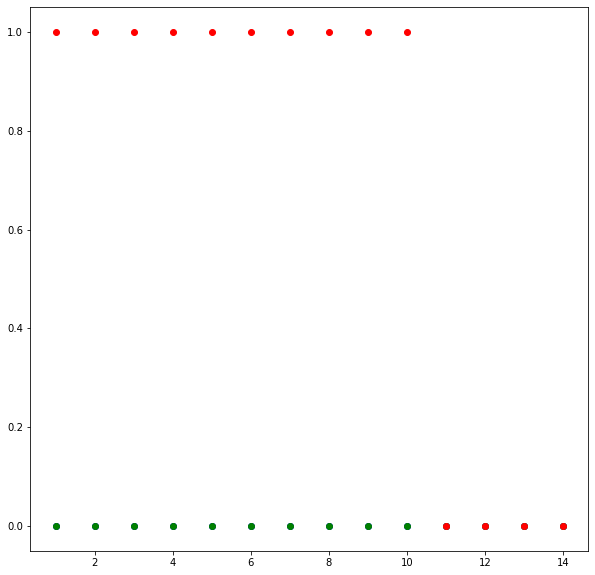

In [182]:
#plot k = 1-15
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,15),errorMAE,'bo')
plt.plot(range(1,15),errorMSE,'go')
plt.plot(range(1,15),errorR2,'ro')

# Training & test (NORD vs CENTRO)

In [49]:
centroGeoData = allArea[allArea.Direction == 'CENTRO']
centroGeoData = centroGeoData.reset_index()
del centroGeoData['index']

In [50]:
dfCentro = createTable(centroGeoData)

In [51]:
yCentro = y(dfCentro,allStart)

In [52]:
df2Centro = createSet(centroGeoData)

In [53]:
df2Centro['y'] = yCentro

In [34]:
nordestGeoData = allArea[allArea.Direction == 'NORD-EST']
nordestGeoData = nordestGeoData.reset_index()
del nordestGeoData['index']

In [35]:
dfNordEst= createTable(nordestGeoData)

In [36]:
yNordEst = y(dfNordEst,allStart)

In [37]:
df2NordEst = createSet(nordestGeoData)

In [38]:
df2NordEst['y'] = yNordEst

In [41]:
df2NordEst.to_csv('df2NordEst.csv')

# KNN preprocessing NORD vs CENTRO

In [191]:
df2Centro['y'].mean()

0.006420948556937568

In [192]:
class_name = 'y'

cols = [col for col in df2Centro.columns if col != class_name]

Q1 = df2Centro[cols].quantile(0.15)
Q3 = df2Centro[cols].quantile(0.85)
IQR = Q3 - Q1

df3Centro = df2Centro[~((df2Centro[cols] < (Q1 - 1.5 * IQR)) |(df2Centro[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [197]:
class_name = 'y'

attributes = [col for col in df2Nord.columns if col != class_name]
X = df2Nord[attributes].values
y=df2Nord[class_name]


X1 = df3Centro[attributes].values
y1=df3Centro[class_name]

In [198]:
X_train = X
y_train = y

X_test = X1
y_test = y1

In [199]:
scaler = StandardScaler()


X_train_s = scaler.fit_transform(X_train)

X_test_s=scaler.transform(X_test)

In [201]:
errorR2 = []
errorMAE = []
errorMSE =[]

for k in range(1,15):
    knn = KNeighborsRegressor(n_neighbors=k,n_jobs=-1,algorithm='kd_tree')
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    errorR2.append(r2_score(y_test,y_pred))
    errorMAE.append(mean_absolute_error(y_test,y_pred))
    errorMSE.append(mean_squared_error(y_test,y_pred))
    

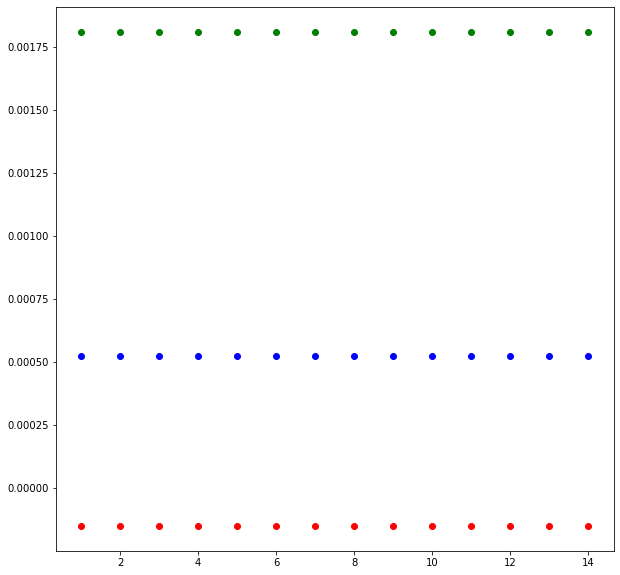

In [202]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)
plt.plot(range(1,15),errorMAE,'bo')
plt.plot(range(1,15),errorMSE,'go')
plt.plot(range(1,15),errorR2,'ro')

In [56]:
df2Centro.to_csv('dfCentroBeijing')
df2Nord.to_csv('dfNordBeijing')
df2Est.to_csv('dfEstBeijing')